# Answers
1. (c)
2. (b)
3. (a),(c)
4. (a)
5. (b)

In [2]:
#3
import math
math.ceil(math.log(10,2))

4

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

"""
More info about the attributes in the dataset:
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset
"""

X, y = load_breast_cancer(return_X_y=True)
print("data shapes:", X.shape, y.shape, np.unique(y))

#print(X[0:5,0:2])

# divide into training and testing
np.random.seed(42)
order = np.random.permutation(len(y))
tr = np.sort(order[:250])
tst = np.sort(order[250:])

svm = LinearSVC(fit_intercept=False, random_state=2)
svm.fit(X[tr, :], y[tr])
preds = svm.predict(X[tst, :])
print("SVM accuracy using no scaler:", np.round(100*accuracy_score(y[tst], preds), 1), "%")

from sklearn.preprocessing import scale as centering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

scalers = [(StandardScaler(with_std=False), "Centering"),
           (StandardScaler(), "Standard"),
           (MinMaxScaler(), "MinMax"),
           (Normalizer(), "Normalizer")]
for scaler, scaler_name in scalers:
  X = scaler.fit_transform(X)
  #print(X[0:5,0:2])
  # divide into training and testing
  np.random.seed(42)
  order = np.random.permutation(len(y))
  tr = np.sort(order[:250])
  tst = np.sort(order[250:])

  svm = LinearSVC(fit_intercept=False, random_state=2)
  svm.fit(X[tr, :], y[tr])
  preds = svm.predict(X[tst, :])
  print("SVM accuracy using",scaler_name,":", np.round(100*accuracy_score(y[tst], preds), 1), "%")


data shapes: (569, 30) (569,) [0 1]
SVM accuracy using no scaler: 89.7 %
SVM accuracy using Centering : 90.9 %
SVM accuracy using Standard : 94.7 %
SVM accuracy using MinMax : 93.7 %
SVM accuracy using Normalizer : 93.1 %


C:\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# the data
from sklearn.datasets import make_blobs
# linear models
from sklearn.linear_model import Perceptron, LinearRegression
# multi-class models
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier

# Create the dataset
C = 4
n = 800
X, y = make_blobs(n, centers=C, random_state=0)

np.random.seed(0)
order = np.random.permutation(n)
tr = order[:int(n/2)]
tst = order[int(n/2):]

Xt = X[tst, :]
yt = y[tst]
X = X[tr, :]
y = y[tr]

In [3]:
# use perceptron with default parameters as the base classifier for the multi-class methods
linear_classifier = Perceptron()
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
clfs = [(OneVsOneClassifier(linear_classifier), "OVO"),
        (OneVsRestClassifier(linear_classifier), "OVA"),
        (OutputCodeClassifier(linear_classifier,random_state=42),"ECOC")]
for clf, name in clfs:
  clf.fit(X, y)
  preds = clf.predict(Xt)
  print("Accuracy using", name + ":", np.round(100*accuracy_score(yt, preds), 1), "%")

Accuracy using OVO: 92.2 %
Accuracy using OVA: 75.8 %
Accuracy using ECOC: 63.0 %


In [19]:
linear_classifier = Perceptron()
code_size = np.arange(0.3, 4.1, 0.1)
ecoc_accuracy = []
lengths = []
for size in code_size:
  clf = OutputCodeClassifier(linear_classifier, random_state=42, code_size=size)
  clf.fit(X, y)
  lengths.append(clf.code_book_.shape[1])
  preds = clf.predict(Xt)
  ecoc_accuracy.append(100*accuracy_score(yt, preds))
lin_clf = LinearRegression()
lin_clf.fit(np.array(lengths).reshape(-1,1),ecoc_accuracy)
print("The coefficient is",round(lin_clf.coef_[0], 1))

The coefficient is 2.0


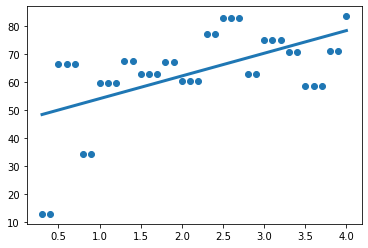

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(code_size.reshape(-1,1),ecoc_accuracy)
plt.plot(code_size.reshape(-1,1),lin_clf.predict(code_size.reshape(-1,1)), linewidth=3)